<center><img src='https://external-preview.redd.it/-GTlUqeD8ViAWYb8dnQ-H0y6-0vxh0kavI-ZV6jIH6o.jpg?auto=webp&s=0bc1717851d03fba29db595b699d432993e41d03'></center>

<center><h1>Deep dive into the Top 5000 Albums on Sonemic (formely RateYourMusic)</h1></center>

<center><img src='https://e.snmc.io/i/600/s/ad1831e78d0ac683a7fcaeeded08c1c5/7011781'></center>

<center>All album art is taken from <a href='https://www.albumartexchange.com/'>albumartexchange.com</a></center>

<center><h1>Import</h1></center>

In [1]:
import os
import calendar
import warnings
from collections import Counter
import math

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

<center><h1>Load Data</h1></center>

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rym-top-5000/rym_raw1.csv
/kaggle/input/rym-top-5000/rym_clean1.csv


In [3]:
df = pd.read_csv('/kaggle/input/rym-top-5000/rym_clean1.csv')

<center><h1>Data Exploration</h1></center>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   int64  
 1   position          5000 non-null   int64  
 2   release_name      5000 non-null   object 
 3   artist_name       5000 non-null   object 
 4   release_date      5000 non-null   object 
 5   release_type      5000 non-null   object 
 6   primary_genres    4999 non-null   object 
 7   secondary_genres  4505 non-null   object 
 8   descriptors       5000 non-null   object 
 9   avg_rating        5000 non-null   float64
 10  rating_count      5000 non-null   int64  
 11  review_count      5000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB


In [5]:
df.head()

,Unnamed: 0,position,release_name,artist_name,release_date,release_type,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count
0,1,1,OK Computer,Radiohead,1997-06-16,album,"Alternative Rock, Art Rock",NaN,"melancholic, anxious, futuristic, malevocals, ...",4.24,74027,1541
1,2,2,Kid A,Radiohead,2000-10-03,album,"Art Rock, Experimental Rock, Electronic","Ambient, Electronic, IDM","cold, melancholic, futuristic, anxious, atmosp...",4.23,61658,751
2,3,3,The Dark Side of the Moon,Pink Floyd,1973-03-23,album,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi...",4.21,60192,1557
3,4,4,Loveless,My Bloody Valentine,1991-11-11,album,"Shoegaze, Noise Pop","Dream Pop, Neo-Psychedelia","noisy, ethereal, atmospheric, romantic, love, ...",4.24,53174,1264
4,5,5,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,album,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist...",4.09,52149,638


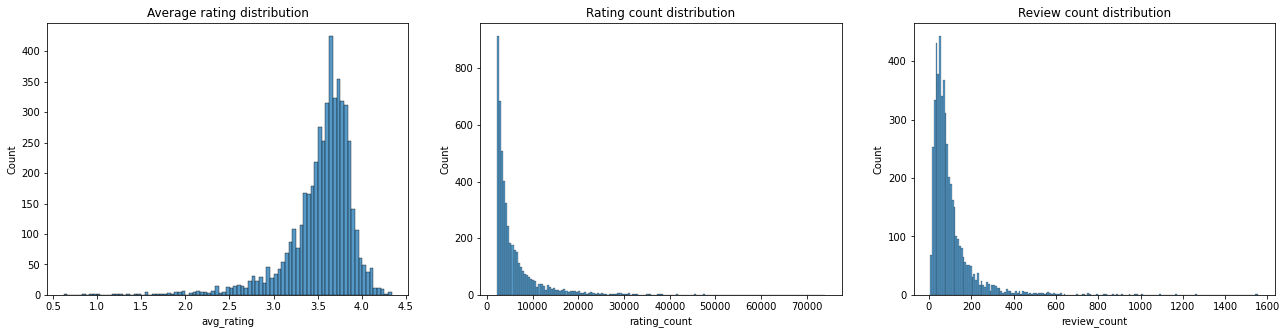

In [6]:
fig, axes = plt.subplots(1, 3, figsize=  (22, 5))
sns.histplot(ax = axes[0], data = df, x="avg_rating").set_title('Average rating distribution')
sns.histplot(ax = axes[1], data = df, x="rating_count").set_title('Rating count distribution')
sns.histplot(ax = axes[2], data = df, x="review_count").set_title('Review count distribution');

We have the following values to work with:

1. Album name and artist
1. Release date
1. Genres (e.g. Shoegaze, Jazz)
1. Descriptors (e.g. cold, melancholic)
1. Ratings from 0.5 to 5

<center><h1>Feature Engineering</h1></center>

In [7]:
df[['release_year','release_month', 'release_day']] = df['release_date'].str.split('-', expand = True)

In [8]:
df['descriptors'] = df['descriptors'].str.split(', ')

In [9]:
df['primary_genres'] = df['primary_genres'].str.split(', ')
df['secondary_genres'] = df['secondary_genres'].str.split(', ')

df['genres'] = df['primary_genres'].fillna("").apply(list) + df['secondary_genres'].fillna("").apply(list)

In [10]:
df['full_name'] = df['artist_name'] + " - " + df['release_name']

In [11]:
warnings.simplefilter(action='ignore') #👻

In [12]:
def table(df):
    fig = go.Figure(data=[go.Table(header = dict(values = list(df.columns), align='left'),
                    cells = dict(values = [df[i] for i in df.columns],           
                    align='left'))
    ])
    return fig

<center><h1>Top 10 best rated albums</h1></center>

<img src="https://i.imgur.com/xZ5s637.jpg"/>

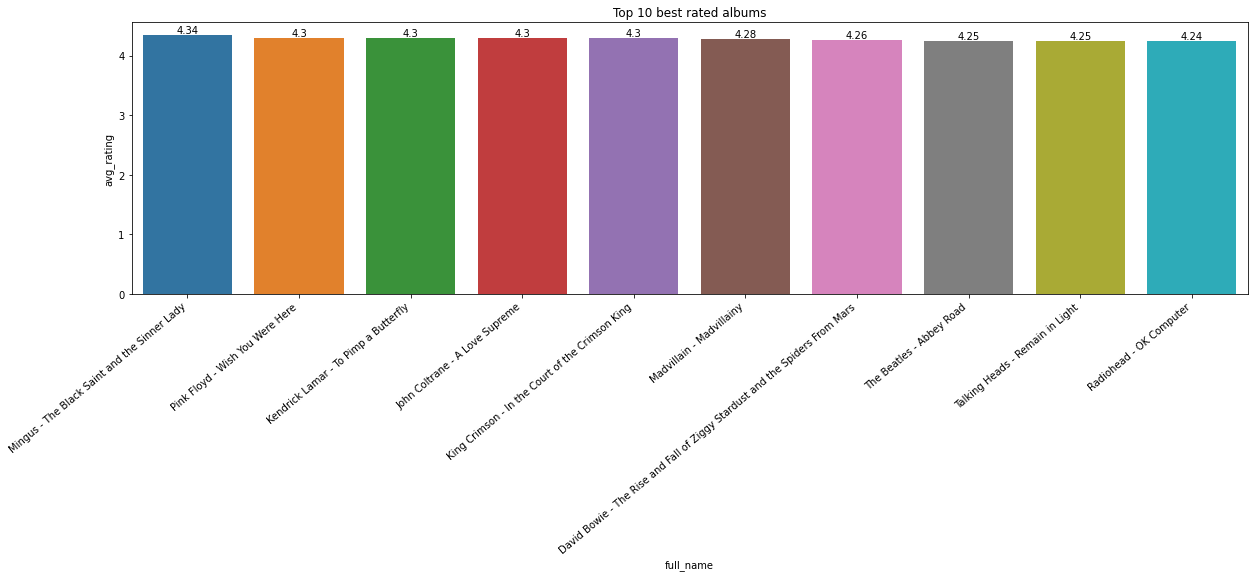

In [13]:
_, ax = plt.subplots(figsize=(20, 5))

data = df.sort_values('avg_rating', ascending = False)

sns.barplot(data = data.head(10), x = "full_name", y = 'avg_rating').set_title('Top 10 best rated albums')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right")
ax.bar_label(ax.containers[0]);

In [14]:
table(df.sort_values('avg_rating', ascending = False)[['artist_name', 'release_name', 'release_date']].reset_index(drop = 'index'))

<center><h1>Top 10 most rated albums</h1></center>

<img src='https://i.imgur.com/kqofP8K.jpg'/>

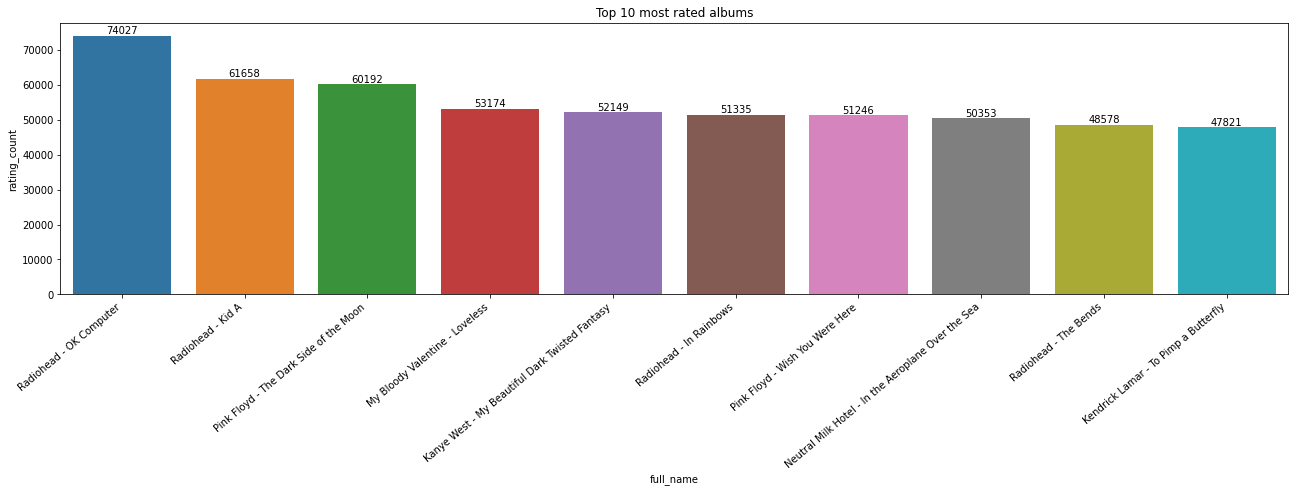

In [15]:
fig, ax = plt.subplots(figsize=(22, 5))

data = df.sort_values('rating_count', ascending = False)

sns.barplot(data = data.head(10), x = "full_name", y = 'rating_count').set_title('Top 10 most rated albums')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
ax.bar_label(ax.containers[0]);

In [16]:
table(data[['artist_name', 'release_name', 'rating_count']].reset_index(drop = 'index'))

<center><h1>Top 10 most reviewed albums</h1></center>

<img src="https://i.imgur.com/MvM8Ep8.jpg"/>

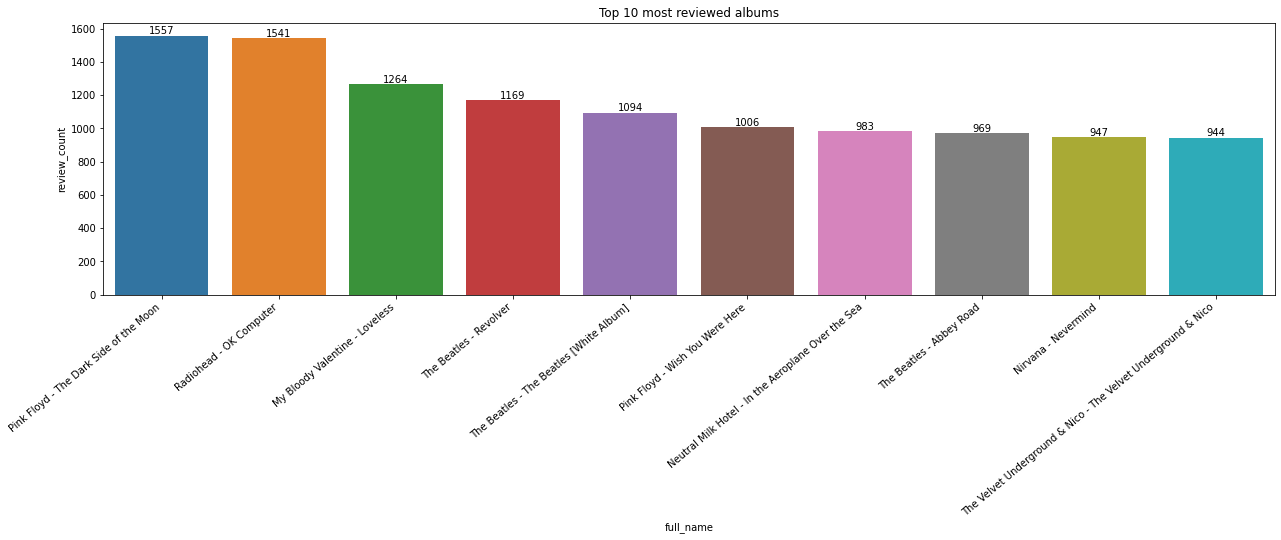

In [17]:
fig, ax = plt.subplots(figsize=(21, 5))

data = df.sort_values('review_count', ascending = False)

sns.barplot(data = data.head(10), x = "full_name", y = 'review_count').set_title('Top 10 most reviewed albums')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
ax.bar_label(ax.containers[0]);

In [18]:
table(data[['artist_name', 'release_name', 'review_count']].reset_index(drop = 'index'))

<center><h1>Top 10 best rated artists</h1></center>

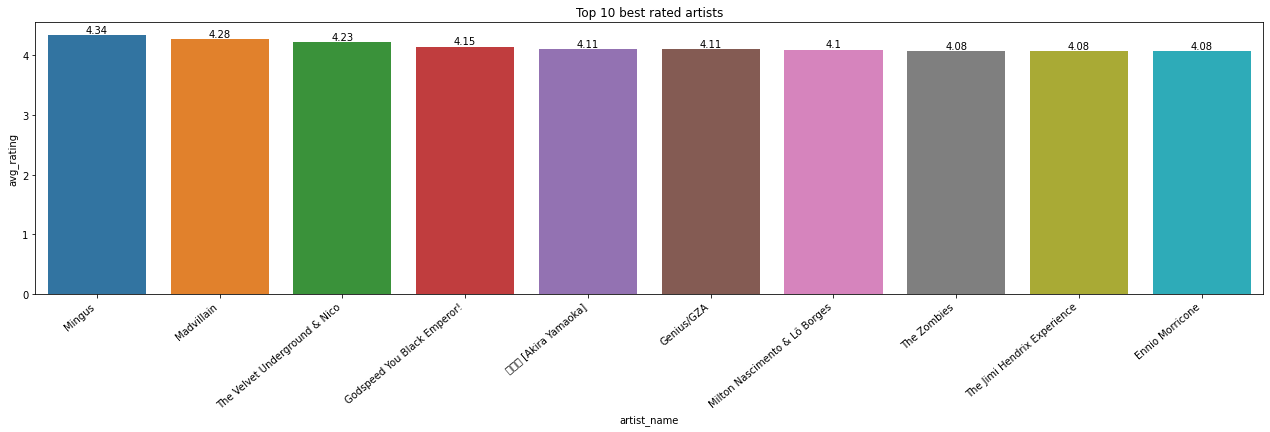

In [19]:
fig, ax = plt.subplots(figsize=(22, 5))

data = df.groupby('artist_name').mean().round(2).sort_values('avg_rating', ascending = False)[['avg_rating']].reset_index(level=0)

sns.barplot(data = data.head(10), x = "artist_name", y = 'avg_rating').set_title('Top 10 best rated artists')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right")
ax.bar_label(ax.containers[0]);

In [20]:
table(data)

<center><h1>Top 10 most rated artists</h1></center>

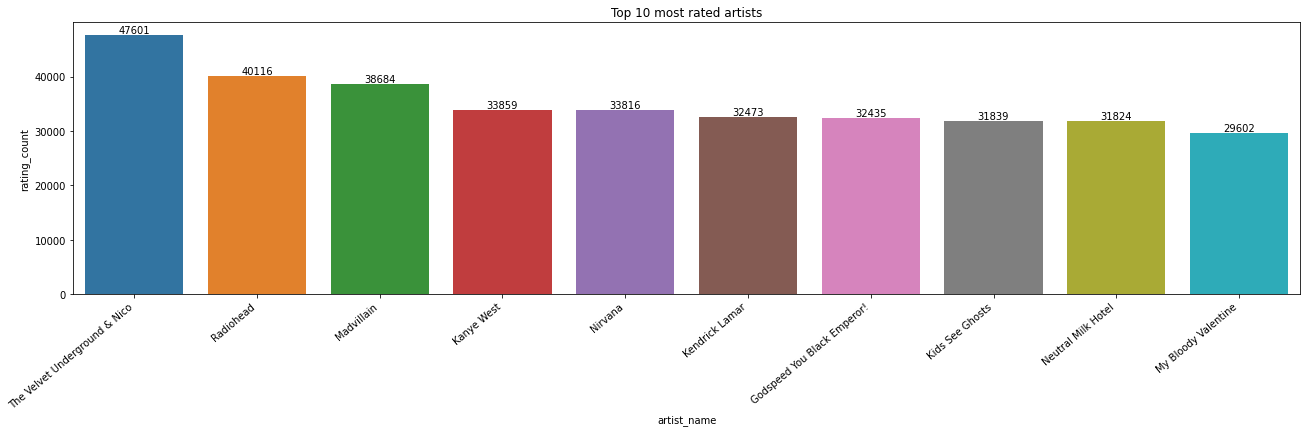

In [21]:
fig, ax = plt.subplots(figsize=(22, 5))

data = df.groupby('artist_name').mean().round(0).sort_values('rating_count', ascending = False)[['rating_count']].reset_index(level=0)

sns.barplot(data = data.head(10), x = "artist_name", y = 'rating_count').set_title('Top 10 most rated artists')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right")
ax.bar_label(ax.containers[0]);

In [22]:
table(data)

<center>Radiohead isn't first, because The Velvet Underground & Nico only have one album under that name, which happens to be very popular.</center>

<center><h1>Top 10 most reviewed artists</h1></center>

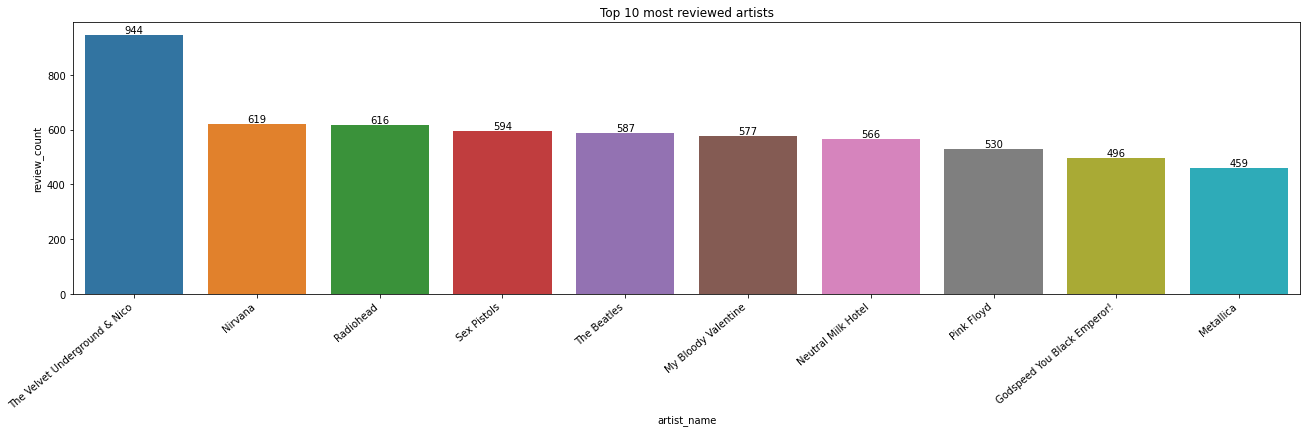

In [23]:
_, ax = plt.subplots(figsize=(22, 5))

data = df.groupby('artist_name').mean().round(0).sort_values('review_count', ascending = False)[['review_count']].reset_index(level=0)

sns.barplot(data = data.head(10), x = "artist_name", y = 'review_count').set_title('Top 10 most reviewed artists')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right")
ax.bar_label(ax.containers[0]);

In [24]:
table(data)

<center><h1>Best rated album for each year</h1></center>

In [25]:
table(df.groupby('release_year').apply(lambda x : x.sort_values(by = 'avg_rating', ascending = False).head(1))[['artist_name', 'release_name', 'avg_rating']].reset_index(level=0))

<center><h1>Yearly average rating</h1></center>

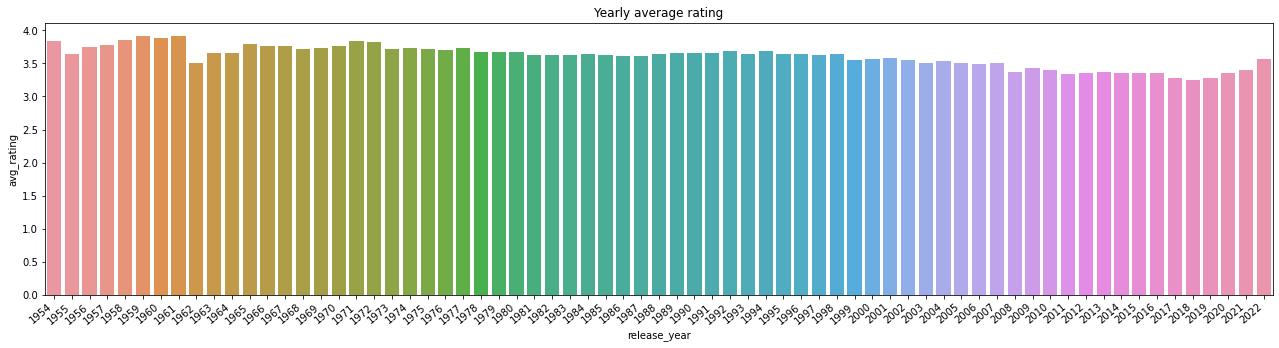

In [26]:
_, ax = plt.subplots(figsize=(22, 5))

data = df.groupby('release_year').mean('avg_rating')['avg_rating'].reset_index(level = 0 )

sns.barplot(data = data, x = "release_year", y = 'avg_rating').set_title('Yearly average rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right");

In [27]:
table(data)

<center><h1>Yearly rating count</h1></center>

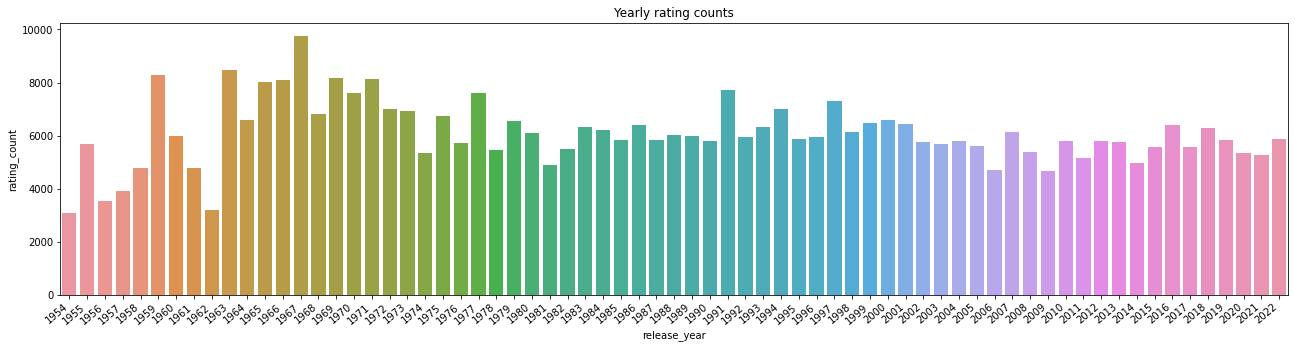

In [28]:
_, ax = plt.subplots(figsize=(22, 5))

data = df.groupby('release_year').mean('rating_count')['rating_count'].reset_index(level = 0 )

sns.barplot(data = data, x = "release_year", y = 'rating_count').set_title('Yearly rating counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right");

In [29]:
table(data)

<center><h1>Yearly average review count</h1></center>

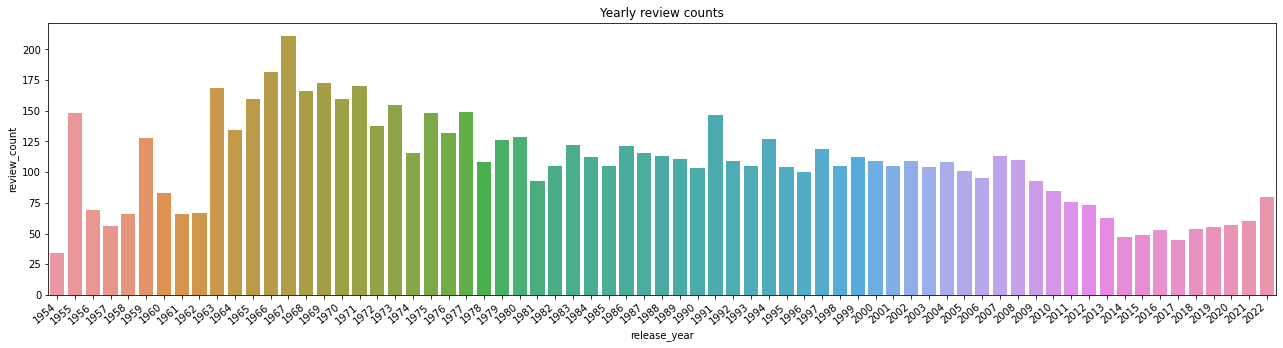

In [30]:
_, ax = plt.subplots(figsize=(22, 5))

data = df.groupby('release_year').mean('review_count').round(0)['review_count'].reset_index(level = 0 )

sns.barplot(data = data, x = "release_year", y = 'review_count').set_title('Yearly review counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right");

<center>People are passionate about the late 60s.</center>

In [31]:
table(data)

<center><h1>Month with Best Music</h1></center>

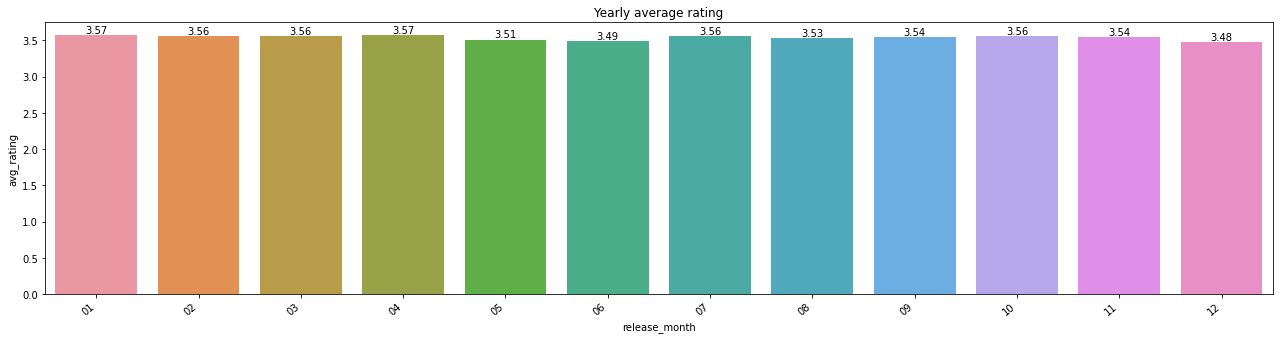

In [32]:
_, ax = plt.subplots(figsize=(22, 5))

data = df.groupby('release_month').mean('avg_rating').round(2)['avg_rating'].reset_index(level = 0)

sns.barplot(data = data, x = "release_month", y = 'avg_rating').set_title('Yearly average rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right")
ax.bar_label(ax.containers[0]);

In [33]:
table(data)

<center>No clear winner...</center>

<center><h1>Top 10 most popular Primary Genres</h1></center>

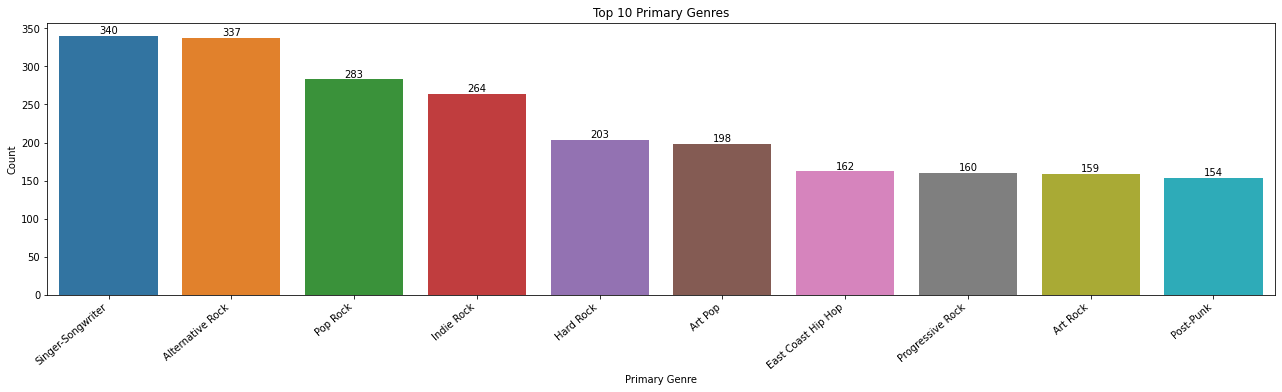

In [34]:
fig, ax = plt.subplots(figsize=(22, 5))

data = df['primary_genres'].explode().value_counts().reset_index(level = 0).rename({'index': 'Genre'})

sns.barplot(data = data.head(10), x = "index", y = 'primary_genres').set_title('Top 10 Primary Genres')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right")
ax.bar_label(ax.containers[0])
ax.set(xlabel='Primary Genre', ylabel='Count');

In [35]:
table(data.rename(columns={"index": "Primary Genre"}))

<center><h1>Top 10 most popular Secondary Genres</h1></center>

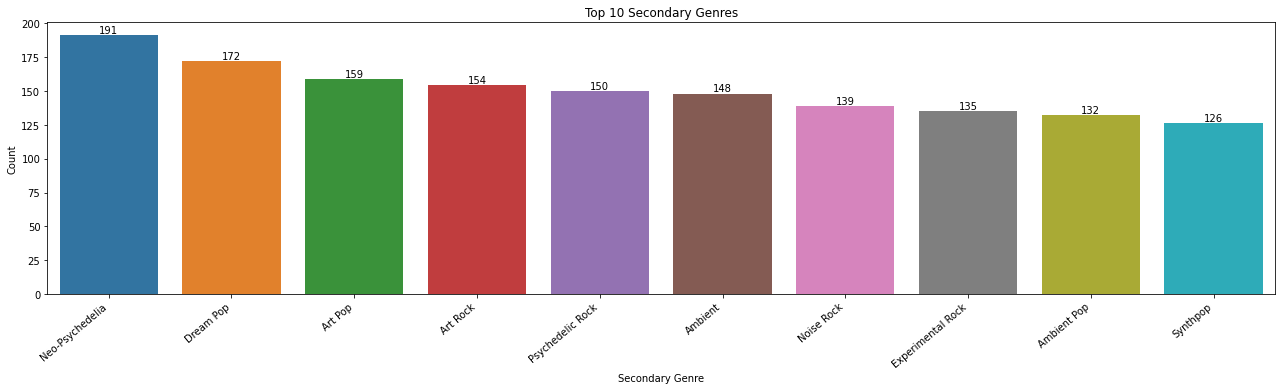

In [36]:
fig, ax = plt.subplots(figsize=(22, 5))

data = df['secondary_genres'].explode().value_counts().reset_index(level = 0)

sns.barplot(data = data.head(10), x = "index", y = 'secondary_genres').set_title('Top 10 Secondary Genres')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
ax.bar_label(ax.containers[0])
ax.set(xlabel='Secondary Genre', ylabel='Count');

In [37]:
table(data.rename(columns={"index": "Primary Genre"}))

<center><h1>Top 10 most popular overall Genres</h1></center>

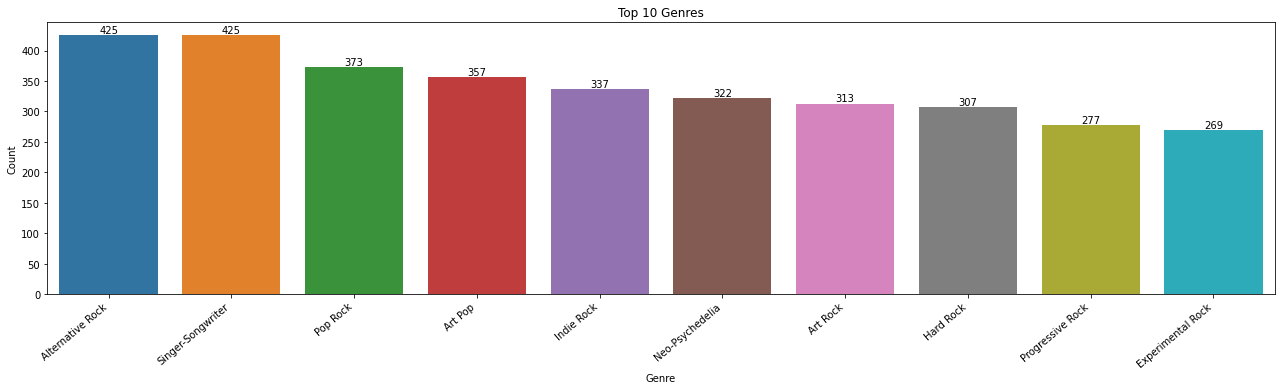

In [38]:
fig, ax = plt.subplots(figsize=(22, 5))

data = df['genres'].explode().value_counts().reset_index(level = 0)

sns.barplot(data = data.head(10), x = "index", y = 'genres').set_title('Top 10 Genres')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right")
ax.bar_label(ax.containers[0])
ax.set(xlabel='Genre', ylabel='Count');

In [39]:
table(data.rename(columns={"index": "Genre"}))

<center><h1>Top 10 rarest Genres</h1></center>

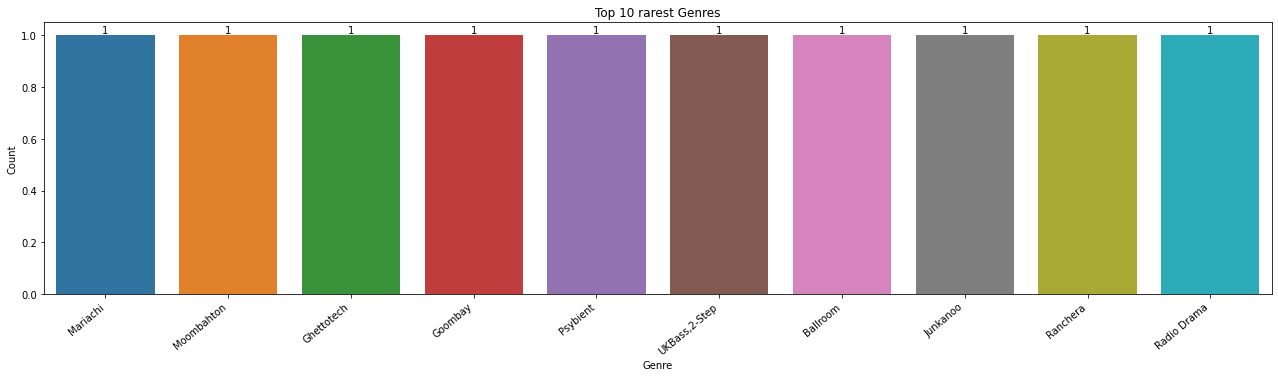

In [40]:
fig, ax = plt.subplots(figsize=(22, 5))

data = df['genres'].explode().value_counts().reset_index(level = 0)

sns.barplot(data = data.tail(10), x = "index", y = 'genres').set_title('Top 10 rarest Genres')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
ax.bar_label(ax.containers[0])
ax.set(xlabel='Genre', ylabel='Count');

In [41]:
table(data.iloc[::-1].rename(columns={"index": "Genre"}))

<center><h1>Top 10 highest rated Genres</h1></center>

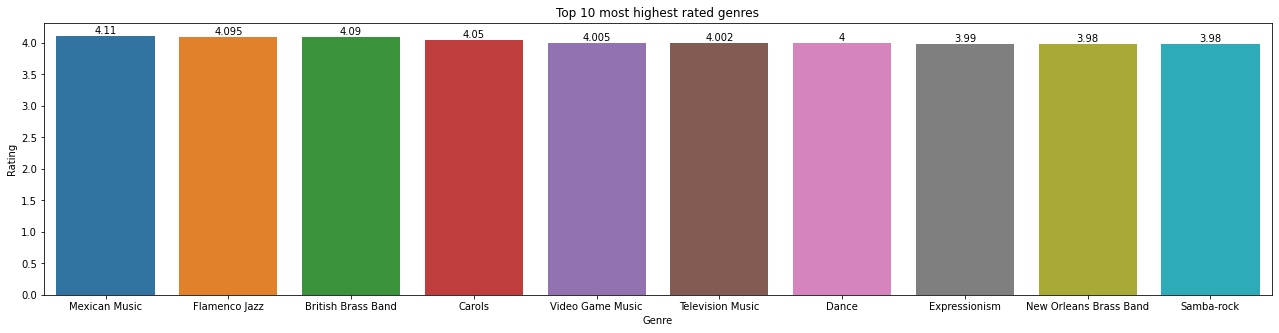

In [42]:
genre_ratings_dict = {}

#Map ratings to year
for index, album in df.iterrows():
    genres = album['genres']
    avg_rating = album['avg_rating']
    for genre in genres:
        if genre in genre_ratings_dict:
            genre_ratings_dict[genre].append(avg_rating)
        else:
            genre_ratings_dict[genre] = [avg_rating]
            
#Get average
for genre, ratings in genre_ratings_dict.items():
    genre_ratings_dict[genre] = sum(ratings)/ float(len(ratings))
    
    
genre_ratings_dict = dict(sorted(genre_ratings_dict.items(), key=lambda item: item[1]))
data = pd.DataFrame(genre_ratings_dict, index=['Average Rating']).T.reset_index(level = 0).sort_values('Average Rating').rename(columns={"index": "Genre"})

keys = list(genre_ratings_dict.keys())[-10:]
keys.reverse()
vals = [float(genre_ratings_dict[k]) for k in keys]

_, ax = plt.subplots(figsize=(22, 5))
ax = sns.barplot(x = keys, y = vals)
ax.bar_label(ax.containers[0])
ax.set_title('Top 10 most highest rated genres')
ax.set(xlabel='Genre', ylabel='Rating');

In [43]:
table(data.iloc[::-1])

<center><h1>Most popular Genre for each Year</h1></center>

In [44]:
year_genre_map = {}

#Map genres to years
for index, album in df.iterrows():
    genres = album['genres']
    release_year = album['release_year']
    
    if release_year not in year_genre_map:
        year_genre_map[release_year] = []
        
    for genre in genres:
        year_genre_map[release_year].append(genre)      

year_genre_map_max = {}        
#Get max
for release_year, genres in year_genre_map.items():
    occurence_count = Counter(year_genre_map[release_year])
    year_genre_map_max[release_year] = occurence_count.most_common(1)[0][0]
    
table(pd.DataFrame(year_genre_map_max, index=['Most Poular Genre']).T.reset_index(level = 0).sort_values('index').rename(columns={"index": 'Year'}))

<center><h1>Popularity of Genres over the years</h1></center>

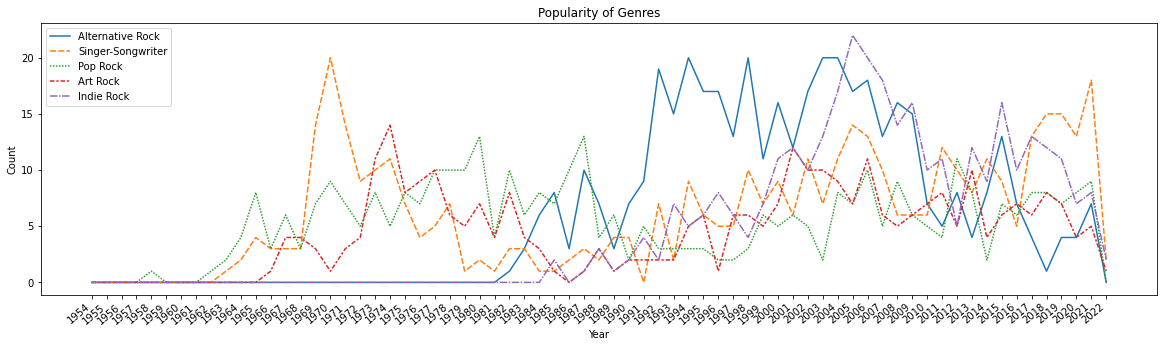

In [45]:
genre_keys = ['Alternative Rock', 'Singer-Songwriter', 'Pop Rock', 'Art Rock', 'Indie Rock']
genres_by_year = {}

for release_year, genres in year_genre_map.items():
    occurence_count = Counter(year_genre_map[release_year])
    genres_occurances = []
    
    for genre_key in genre_keys:
        n = occurence_count.get(genre_key)
        if n is None or math.isnan(n):
            n = 0
        genres_occurances.append(n)
    
    genres_by_year[release_year] = genres_occurances

data = pd.DataFrame(genres_by_year).T.sort_index()
data.columns = genre_keys

_, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = data)
ax.set_title('Popularity of Genres')
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
ax.set(xlabel='Year', ylabel='Count');

<center><h1>Top 10 most popular Descriptors</h1></center>

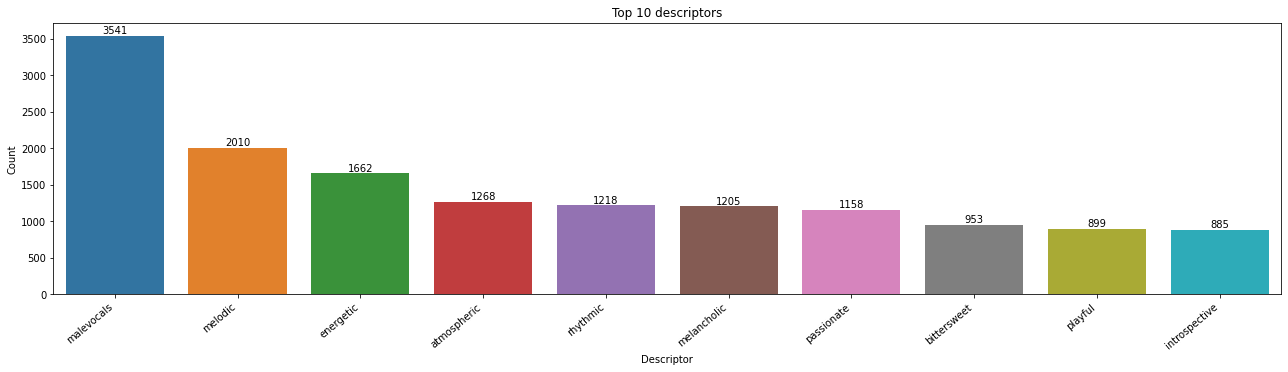

In [46]:
fig, ax = plt.subplots(figsize=(22, 5))

data = df['descriptors'].explode().value_counts().reset_index(level = 0)

sns.barplot(data = data.head(10), x = "index", y = 'descriptors').set_title('Top 10 descriptors')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right")
ax.bar_label(ax.containers[0])
ax.set(xlabel='Descriptor', ylabel='Count');

In [47]:
table(data.rename(columns={"index": "Descriptor"}))

<center><h1>Top 10 highest rated Descriptors</h1></center>

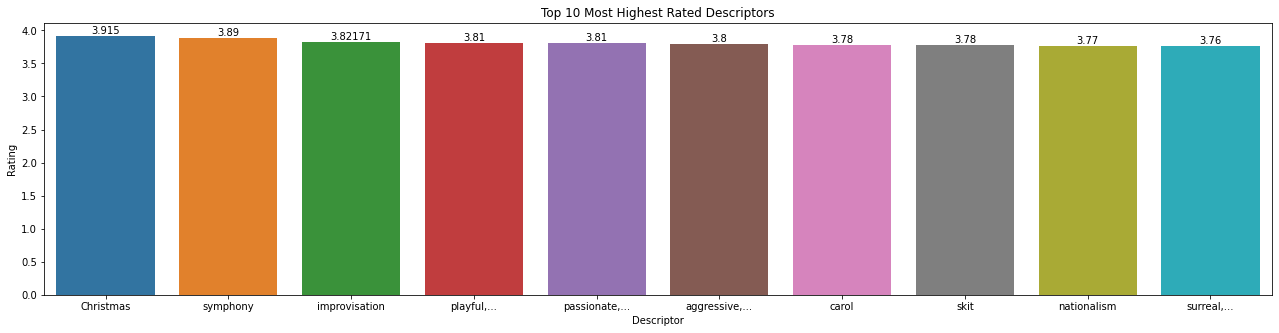

In [48]:
descriptor_ratings_dict = {}

#Map ratings to year
for index, album in df.iterrows():
    descriptors = album['descriptors']
    avg_rating = album['avg_rating']
    for descriptor in descriptors:
        if descriptor in descriptor_ratings_dict:
            descriptor_ratings_dict[descriptor].append(avg_rating)
        else:
            descriptor_ratings_dict[descriptor] = [avg_rating]     

#Get average
for descriptor, ratings in descriptor_ratings_dict.items():
    descriptor_ratings_dict[descriptor] = sum(ratings)/ float(len(ratings))
    
descriptor_ratings_dict = dict(sorted(descriptor_ratings_dict.items(), key=lambda item: item[1]))
data = pd.DataFrame(descriptor_ratings_dict, index=['Average Rating']).T.reset_index(level = 0).sort_values('index').rename(columns={"index": "Descriptor"})
keys = list(descriptor_ratings_dict.keys())[-10:]
keys.reverse()
vals = [float(descriptor_ratings_dict[k]) for k in keys]

_, ax = plt.subplots(figsize=(22, 5))
ax = sns.barplot(x = keys, y = vals)
ax.bar_label(ax.containers[0])
ax.set_title('Top 10 Most Highest Rated Descriptors')
ax.set(xlabel='Descriptor', ylabel='Rating');

<center>This is a weird one...</center>

In [49]:
table(data)

<center><h1>Top 10 rarest Descriptors</h1></center>

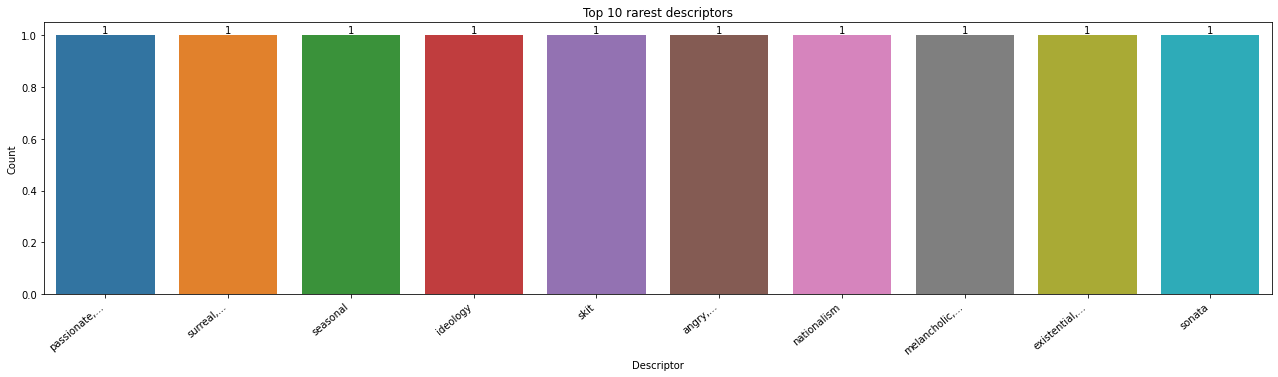

In [50]:
fig, ax = plt.subplots(figsize=(22, 5))

data = df['descriptors'].explode().value_counts().reset_index(level = 0)

sns.barplot(data = data.tail(10), x = "index", y = 'descriptors').set_title('Top 10 rarest descriptors')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
ax.bar_label(ax.containers[0])
ax.set(xlabel='Descriptor', ylabel='Count');

In [51]:
table(data.iloc[::-1].rename(columns={"index": "Descriptor"}))

<center><h1>Most popular Descriptor each Year</h1></center>

In [52]:
year_descriptor_map = {}

#Map descriptors to years
for index, album in df.iterrows():
    descriptors = album['descriptors']
    release_year = album['release_year']
    
    if release_year not in year_descriptor_map:
        year_descriptor_map[release_year] = []
        
    for descriptor in descriptors:
        year_descriptor_map[release_year].append(descriptor)      

year_descriptor_map_max = {}        
#Get max
for release_year, descriptors in year_descriptor_map.items():
    occurence_count = Counter(year_descriptor_map[release_year])
    year_descriptor_map_max[release_year] = occurence_count.most_common(1)[0][0]
    
table(pd.DataFrame(year_descriptor_map_max, index=['Most Poular Genre']).T.reset_index(level = 0).rename(columns={"index": "Year"}).sort_values('Year'))

<center>The first and last entries are love.</center>

<center><h1>Popularity of Descriptors over the Years</h1></center>

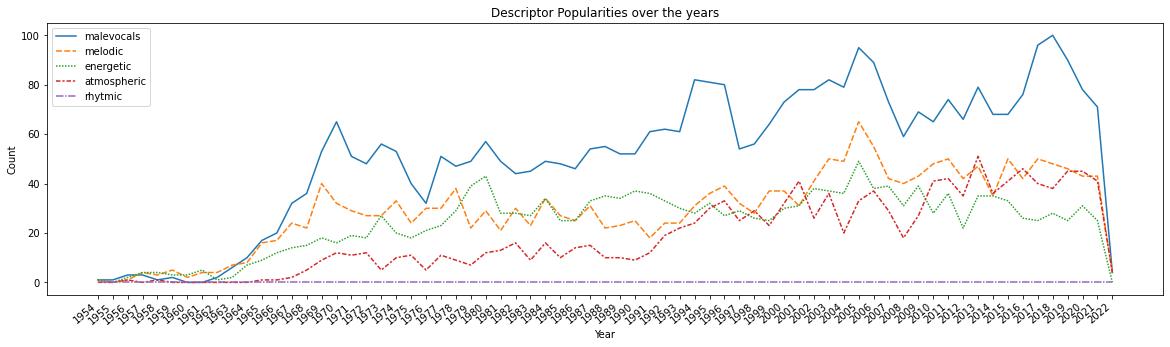

In [53]:
descriptor_keys = ['malevocals', 'melodic', 'energetic', 'atmospheric', 'rhytmic']
descriptors_by_year = {}

for release_year, descriptors in year_descriptor_map.items():
    occurence_count = Counter(year_descriptor_map[release_year])
    descriptors_occurances = []
    
    for descriptor_key in descriptor_keys:
        n = occurence_count.get(descriptor_key)
        if n is None or math.isnan(n):
            n = 0
        descriptors_occurances.append(n)
    
    descriptors_by_year[release_year] = descriptors_occurances

data = pd.DataFrame(descriptors_by_year).T.sort_index()
data.columns = descriptor_keys

_, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = data)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
ax.set_title('Descriptor Popularities over the years')
ax.set(xlabel='Year', ylabel='Count');

<center><h1>Top descriptor for each Genre</h1></center>

In [54]:
genre_descriptor_map = {}

#Map descriptors to genre
for index, album in df.iterrows():
    descriptors = album['descriptors']
    genres = album['genres']
    
    for genre in genres:
        if genre not in genre_descriptor_map:
            genre_descriptor_map[genre] = []
        genre_descriptor_map[genre] += descriptors
        

genre_descriptor_top = {}        
#Get max
for genre, descriptors in genre_descriptor_map.items():
    occurence_count = Counter(genre_descriptor_map[genre])
    genre_descriptor_top[genre] = occurence_count.most_common(1)[0][0]
    
table(pd.DataFrame(genre_descriptor_top, index=['Most Poular Genre']).T.reset_index(level = 0).rename(columns={"index": "Descriptor"}).sort_values('Descriptor'))